In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


house_prices = pd.read_csv('datasets/median_house_prices_us.csv')
house_incomes = pd.read_csv('datasets/median_house_income_us.csv')


gold_data = yf.download('GC=F', start='2000-01-01', end='2025-01-01', interval='1mo')
gold_prices = gold_data['Close'].dropna()
quarterly_gold = gold_prices.resample('QS').first()

print(house_prices.head())
print(house_incomes.head())

# Ensure datetime format
house_prices['observation_date'] = pd.to_datetime(house_prices['observation_date'])

house_incomes['observation_date'] = pd.to_datetime(house_incomes['observation_date'])

# Set index for merging
quarterly_gold = quarterly_gold.rename_axis('Date').reset_index()
quarterly_gold['Date'] = pd.to_datetime(quarterly_gold['Date'])



[*********************100%***********************]  1 of 1 completed

  observation_date   MSPUS
0       2000-01-01  165300
1       2000-04-01  163200
2       2000-07-01  168800
3       2000-10-01  172900
4       2001-01-01  169800
  observation_date  MEHOINUSA672N
0       2000-01-01          70020
1       2001-01-01          68870
2       2002-01-01          68310
3       2003-01-01          68350
4       2004-01-01          68250


  observation_date   MSPUS       Date        GC=F  MEHOINUSA672N  \
0       2001-01-01  169800 2001-01-01  265.600006          68870   
1       2002-01-01  188700 2002-01-01  282.100006          68310   
2       2003-01-01  186000 2003-01-01  368.299988          68350   
3       2004-01-01  212700 2004-01-01  402.200012          68250   
4       2005-01-01  232500 2005-01-01  421.799988          69310   

   house_to_gold_ratio  house_to_income_ratio  
0           639.307214               2.465515  
1           668.911719               2.762407  
2           505.023096               2.721287  
3           528.841356               3.116484  
4           551.209120               3.354494  
   observation_date   MSPUS       Date         GC=F  MEHOINUSA672N  \
18       2019-01-01  313000 2019-01-01  1319.699951          81210   
19       2020-01-01  329000 2020-01-01  1582.900024          79560   
20       2021-01-01  355000 2021-01-01  1847.300049          79260   
21       2022-01-01  41

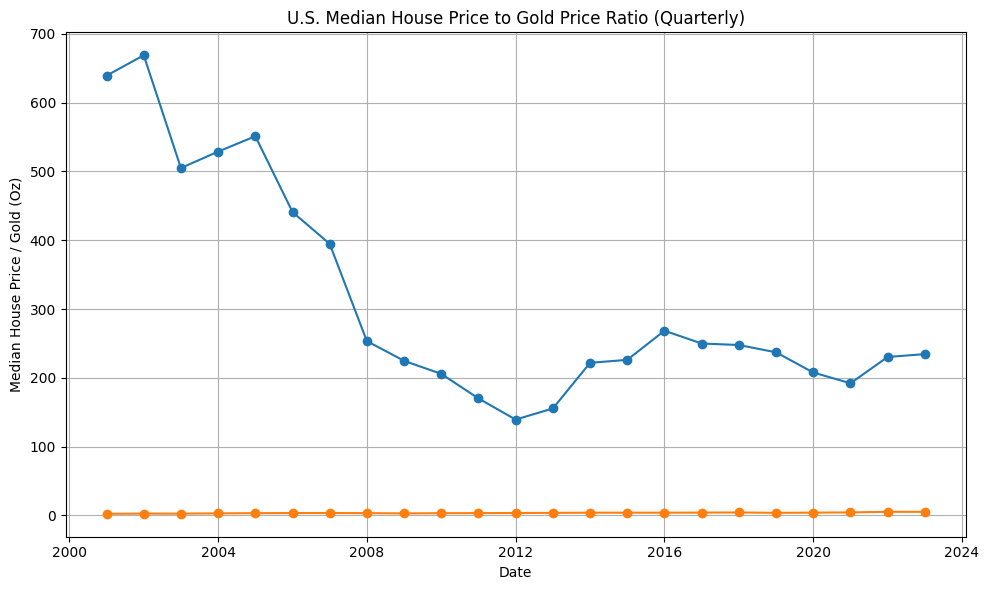

In [21]:


# Merge on the common date
gold_and_house_pricesmerged = pd.merge(house_prices, quarterly_gold, left_on='observation_date', right_on='Date')

merged = pd.merge(gold_and_house_pricesmerged, house_incomes, left_on='observation_date', right_on='observation_date')

# Calculate ratio
merged['house_to_gold_ratio'] = merged['MSPUS'] / merged['GC=F']
merged['house_to_income_ratio'] = merged['MSPUS'] / merged['MEHOINUSA672N']

print(merged.head())
print(merged.tail())

# Plot
if 1:
    plt.figure(figsize=(10, 6))
    plt.plot(merged['observation_date'], merged['house_to_gold_ratio'], marker='o')
    plt.plot(merged['observation_date'], merged['house_to_income_ratio'], marker='o')
    plt.title('U.S. Median House Price to Gold Price Ratio (Quarterly)')
    plt.xlabel('Date')
    plt.ylabel('Median House Price / Gold (Oz)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()